### K-Means Clustering:

K-Means Clustering is a popular unsupervised learning algorithm used for partitioning a dataset into K distinct, non-overlapping subsets or clusters. It aims to group similar data points together while keeping different groups as distinct as possible.

#### Key Concepts

1. **Centroid**:
   - The center of a cluster. Initially, centroids are chosen randomly.
   - Centroids are recalculated as the mean of all data points assigned to that cluster.

2. **Inertia (Within-Cluster Sum of Squares)**:
   - Measures how well the clusters are formed.
   - Lower inertia indicates more compact and well-defined clusters.

3. **Silhouette Score**:
   - Measures the quality of clusters.
   - Value ranges from -1 to 1. Higher scores indicate better clustering.

#### Steps in K-Means Clustering

1. **Initialization**:
   - Choose K, the number of clusters.
   - Randomly initialize K centroids.

2. **Assignment**:
   - Assign each data point to the nearest centroid.
   - This forms K clusters.

3. **Update**:
   - Recalculate the centroid of each cluster as the mean of all points in the cluster.

4. **Repeat**:
   - Repeat the assignment and update steps until convergence (centroids no longer change) or a maximum number of iterations is reached.

5. **Evaluation**:
   - Evaluate the clustering using metrics like inertia and silhouette score.

### Important Points to Discuss

1. **Choosing K (Number of Clusters)**:
   - Use the Elbow Method: Plot inertia vs. number of clusters and look for an "elbow" point where the inertia starts to decrease more slowly.
   - Use the Silhouette Score: Choose K that maximizes the silhouette score.

2. **Centroid Initialization**:
   - The initial choice of centroids can affect the outcome. The K-Means++ initialization method helps by spreading out the initial centroids.

3. **Convergence**:
   - K-Means might converge to a local minimum. Running the algorithm multiple times with different initializations can help find a better clustering.

4. **Evaluation Metrics**:
   - **Inertia**: Measures the compactness of the clusters. Lower inertia is better.
   - **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. Values near 1 indicate well-clustered points, while values near -1 indicate points assigned to the wrong cluster.

5. **Scalability**:
   - K-Means is efficient and scales to large datasets, but the computation time increases with the number of data points and clusters.

6. **Limitations**:
   - Sensitive to the initial choice of centroids.
   - Assumes clusters are spherical and of similar size.
   - May not work well with clusters of different shapes and densities.

### Real-World Applications

1. **Customer Segmentation**:
   - Identify distinct customer groups based on purchasing behavior.
   
2. **Image Compression**:
   - Reduce the number of colors in an image by clustering similar colors.

3. **Document Clustering**:
   - Group similar documents together based on content.

4. **Anomaly Detection**:
   - Detect outliers as points that do not fit into any cluster well.

#### Example

practical example with a customer dataset where we aim to cluster customers based on their annual income and spending score.

##### Step 1: Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Example dataset
data = {'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Annual Income': [15, 16, 17, 16, 18, 19, 20, 21, 21, 25],
        'Spending Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]}

In [3]:
df = pd.DataFrame(data)
X = df[['Annual Income', 'Spending Score']]

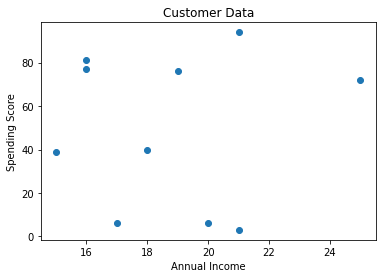

In [4]:
# Plot the data
plt.scatter(X['Annual Income'], X['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Data')
plt.show()

In [5]:
##### Step 2: Build the K-Means Model

### Choose the number of clusters
K = 4

In [27]:
# Build the K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=9, random_state=0)

In [28]:
# Predict the cluster for each data point
clusters = kmeans.predict(X)
df['Cluster'] = clusters

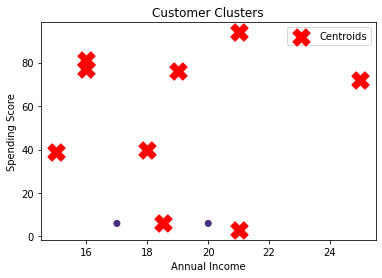

In [29]:
# Plot the clustered data
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.legend()
plt.show()

In [30]:
##### Step 3: Evaluate the Model

In [31]:
# Calculate Inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 4.5


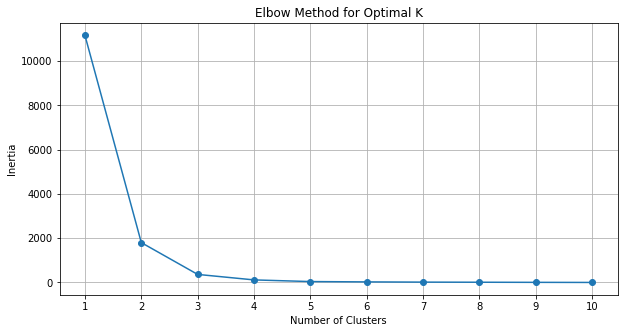

In [32]:
# Elbow Method to find the optimal number of clusters
inertia_values = []
K_range = range(1, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot inertia values
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [33]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.045131670194948625


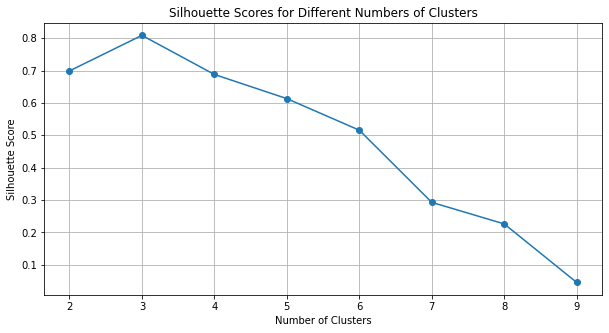

In [34]:
# Silhouette scores for different numbers of clusters
silhouette_scores = []
K_range = range(2, min(len(X), 11))  # Limit the range of clusters

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(K_range)
plt.grid(True)
plt.show()


### PCA
    Reducing Dimensions of Fruit Data

Imagine you have a dataset containing information about different fruits, such as their size, weight, and color. Each fruit is represented as a data point with multiple features. However, you want to simplify the dataset to only two dimensions for visualization purposes.

#### Step 1: Understand the Original Dataset

Suppose your original dataset looks like this:

| Fruit  | Size (cm) | Weight (g) | Color (RGB) |
|--------|-----------|------------|-------------|
| Apple  | 5         | 100        | (255, 0, 0) |
| Banana | 7         | 120        | (255, 255, 0) |
| Orange | 6         | 150        | (255, 165, 0) |
| Grape  | 3         | 5          | (128, 0, 128) |

Each row represents a fruit, and each column represents a feature. In this case, there are three features: size, weight, and color.

#### Step 2: Standardize the Data

To perform PCA, you need to standardize the data by subtracting the mean and scaling to unit variance. This step ensures that each feature contributes equally to the analysis.

#### Step 3: Compute the Covariance Matrix

Next, calculate the covariance matrix of the standardized data. The covariance matrix measures the relationships between different features. It tells you how much two features vary together.

#### Step 4: Find Eigenvectors and Eigenvalues

Compute the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues represent the magnitude of variance along those directions.

#### Step 5: Select Principal Components

Sort the eigenvectors by their corresponding eigenvalues in descending order. The eigenvector with the highest eigenvalue represents the principal component that captures the most variance in the data. Choose the top principal components based on the amount of variance you want to retain.

#### Step 6: Project Data onto Principal Components

Finally, project the original data onto the selected principal components to obtain a lower-dimensional representation of the dataset. Each data point will now be represented by its coordinates along the principal components.

### Intuitive Explanation

Imagine you have a bunch of fruits scattered in a three-dimensional space, with each dimension representing a different feature. PCA helps you find the directions (principal components) along which the fruits vary the most. By focusing on these directions, you can capture the essential structure of the data in fewer dimensions.

In our example, after performing PCA, you might find that most of the variation in the fruit data lies in the size and weight of the fruits. Therefore, you can represent each fruit using just these two dimensions, simplifying the dataset for visualization or further analysis.

### Conclusion

PCA is a powerful technique for reducing the dimensionality of data while preserving as much of its variance as possible. It allows you to uncover the underlying structure of complex datasets and visualize them in a more manageable form.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
# Example dataset
data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Grape'],
    'Size (cm)': [5, 7, 6, 3],
    'Weight (g)': [100, 120, 150, 5],
    'Color_R': [255, 255, 255, 128],
    'Color_G': [0, 255, 165, 0],
    'Color_B': [0, 0, 0, 128]
}

In [37]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [38]:
# Extract features (excluding 'Fruit' column)
X = df.drop(columns=['Fruit'])

In [39]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

In [41]:
# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Fruit'] = df['Fruit']

In [42]:
# Variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

# Print variance explained by each principal component
for i, var_exp in enumerate(variance_explained):
    print(f"Variance explained by PC{i+1}: {var_exp:.2f}")

# Total variance explained
total_variance_explained = np.sum(variance_explained)
print(f"Total variance explained by all principal components: {total_variance_explained:.2f}")

Variance explained by PC1: 0.86
Variance explained by PC2: 0.13
Total variance explained by all principal components: 0.99


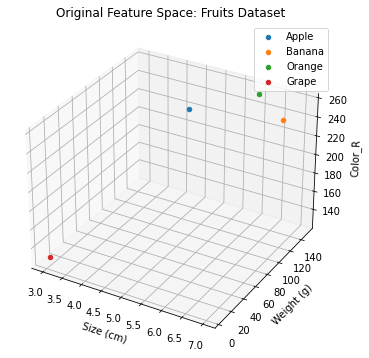

In [43]:
# Plot original feature space
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each fruit
for i, fruit in enumerate(df['Fruit']):
    ax.scatter(df.loc[i, 'Size (cm)'], df.loc[i, 'Weight (g)'], df.loc[i, 'Color_R'], label=fruit)

# Set labels and title
ax.set_xlabel('Size (cm)')
ax.set_ylabel('Weight (g)')
ax.set_zlabel('Color_R')
ax.set_title('Original Feature Space: Fruits Dataset')

# Add legend
ax.legend()

plt.show()

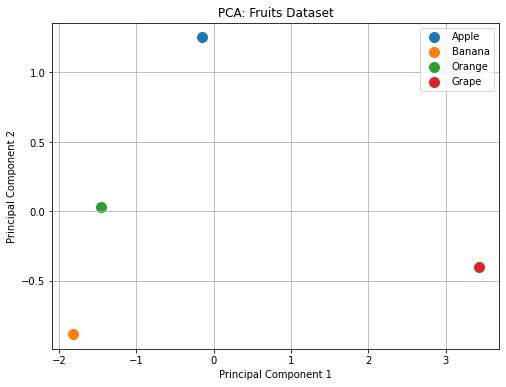

In [44]:
# Plot PCA results
plt.figure(figsize=(8, 6))
for i, fruit in enumerate(df['Fruit']):
    plt.scatter(pca_df.loc[i, 'PC1'], pca_df.loc[i, 'PC2'], label=fruit, color='C'+str(i), s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Fruits Dataset')
plt.legend()
plt.grid(True)
plt.show()